In [1]:
## Based on code from: 
#  - Covid data: https://github.com/biplav-s/course-d2d-ai/blob/main/sample-code/l3-health/CovidExploration.ipynb
#  - Time-series: https://github.com/biplav-s/course-d2d-ai/blob/main/sample-code/l13-timeseries/2-Time%20with%20Pandas.ipynb

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date

# Data
* World is at: https://github.com/CSSEGISandData/COVID-19 by Johns Hopkins
* US is at NY Times resources: https://developer.nytimes.com/covid


In [3]:
# We get the latest data from NYT about COVID-19
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
# Read data from local file
data_latest = pd.read_csv(url, parse_dates=['date'], index_col='date')
data_latest.tail()

,county,state,fips,cases,deaths
date,,,,,
2021-08-28,Sweetwater,Wyoming,56037.0,5460,49.0
2021-08-28,Teton,Wyoming,56039.0,4356,11.0
2021-08-28,Uinta,Wyoming,56041.0,2914,14.0
2021-08-28,Washakie,Wyoming,56043.0,1016,26.0
2021-08-28,Weston,Wyoming,56045.0,773,6.0


In [4]:
# Basic information about the data
data_latest.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1663919 entries, 2020-01-21 to 2021-08-28
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   county  1663919 non-null  object 
 1   state   1663919 non-null  object 
 2   fips    1648791 non-null  float64
 3   cases   1663919 non-null  int64  
 4   deaths  1626438 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 76.2+ MB


In [5]:
# Simple statistics
data_latest.describe()

,fips,cases,deaths
count,1.648791e+06,1.663919e+06,1.626438e+06
mean,3.136047e+04,5.533976e+03,1.095223e+02
std,1.632843e+04,2.690024e+04,6.570806e+02
min,1.001000e+03,0.000000e+00,0.000000e+00
25%,1.901500e+04,1.560000e+02,2.000000e+00
50%,3.000300e+04,9.110000e+02,1.700000e+01
75%,4.610700e+04,3.180000e+03,6.200000e+01
max,7.803000e+04,1.397943e+06,3.379500e+04


In [6]:
# FIPS Code is explained here: https://www.census.gov/quickfacts/fact/note/US/fips

In [7]:
# Display figures
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
# Use seaborn style defaults; set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

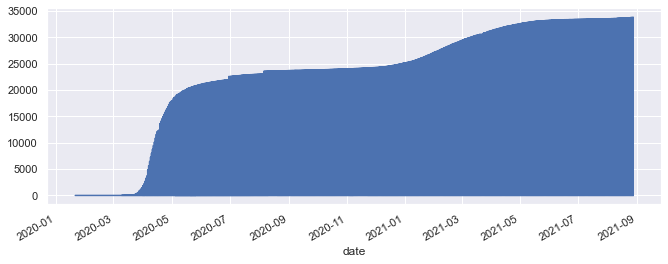

In [8]:
# Just aggregate statistics
data_latest['deaths'].plot();

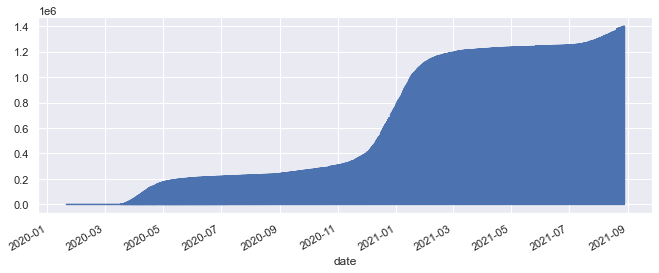

In [9]:
# Just aggregate statistics
data_latest['cases'].plot();

In [10]:
# Finding the number of cases in a state and county
condition = (data_latest['state'] =='South Carolina')
data_sc = data_latest[condition]

In [11]:
# Optionally, store the data
file = '../common-data/covid/latest_sc.csv'
data_sc.to_csv(file)

In [12]:
# Finding the number of cases in a state and county
condition = (data_latest['state'] =='South Carolina') & (data_latest['county'] =='Richland')
data_sc_r = data_latest[condition]

In [13]:
# Optionally, store the data
file = '../common-data/covid/latest_sc_r.csv'
data_sc_r.to_csv(file)

In [14]:
# Get a sample of Richland data
data_sc_r.head()

,county,state,fips,cases,deaths
date,,,,,
2020-03-17,Richland,South Carolina,45079.0,1,0.0
2020-03-18,Richland,South Carolina,45079.0,4,0.0
2020-03-19,Richland,South Carolina,45079.0,8,0.0
2020-03-20,Richland,South Carolina,45079.0,22,0.0
2020-03-21,Richland,South Carolina,45079.0,28,0.0


In [15]:
# Drop non-essential columns
daily_data = data_sc_r.drop(['county', 'state', 'fips'], axis=1).diff()
daily_data.head()

,cases,deaths
date,,
2020-03-17,NaN,NaN
2020-03-18,3.0,0.0
2020-03-19,4.0,0.0
2020-03-20,14.0,0.0
2020-03-21,6.0,0.0


In [16]:
# First or any data with null too
daily_data = daily_data.dropna()
daily_data.head()

,cases,deaths
date,,
2020-03-18,3.0,0.0
2020-03-19,4.0,0.0
2020-03-20,14.0,0.0
2020-03-21,6.0,0.0
2020-03-22,3.0,0.0


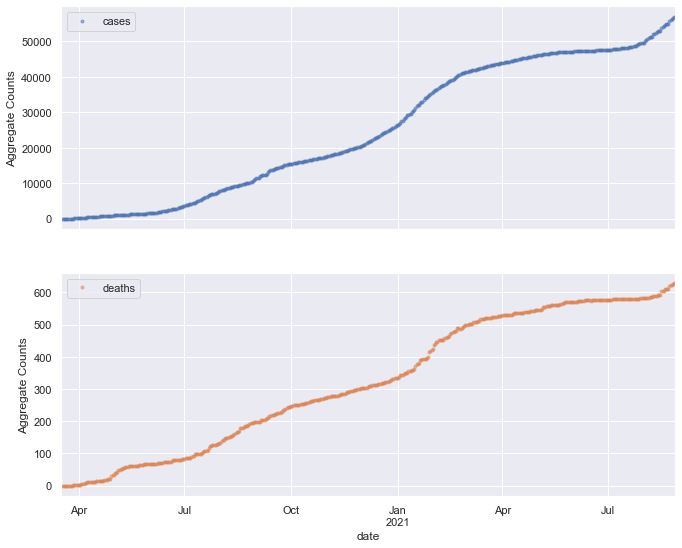

In [17]:
# Multiple information about aggregate
cols_plot = ['cases', 'deaths']
axes = data_sc_r[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Aggregate Counts')

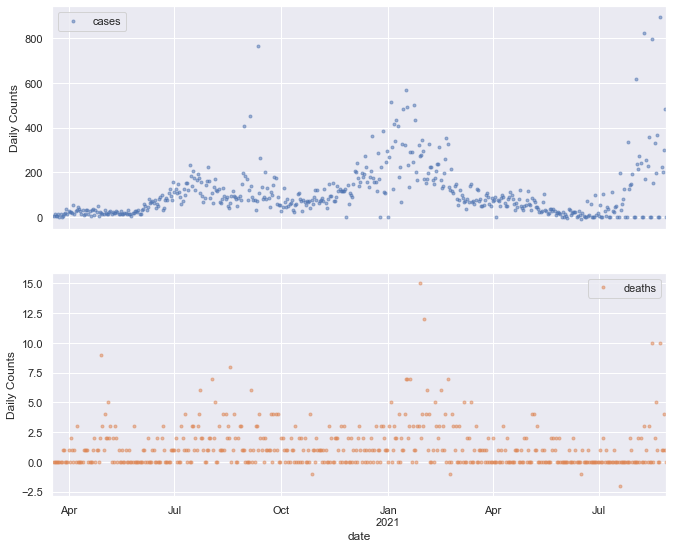

In [18]:
# Multiple information
cols_plot = ['cases', 'deaths']
axes = daily_data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Counts')

In [19]:
# Seeing visually if there is a relationship between cases and deaths
import matplotlib.pyplot as plt
%matplotlib inline

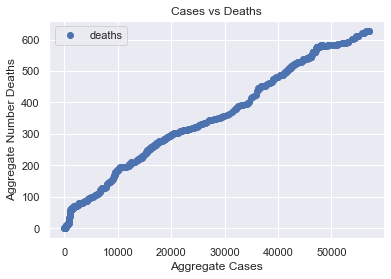

In [20]:
data_sc_r.plot(x='cases', y='deaths', style='o')
plt.title('Cases vs Deaths')
plt.xlabel('Aggregate Cases')
plt.ylabel('Aggregate Number Deaths')
plt.show()

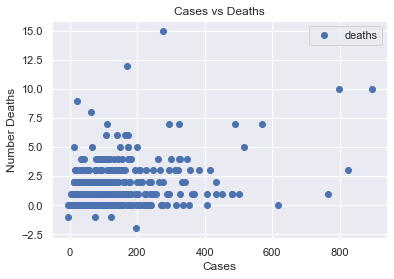

In [21]:
daily_data.plot(x='cases', y='deaths', style='o')
plt.title('Cases vs Deaths')
plt.xlabel('Cases')
plt.ylabel('Number Deaths')
plt.show()

In [22]:
# Store daily data
# Optionally, store the data
file = '../common-data/covid/latest_daily_sc_r.csv'
daily_data.to_csv(file)

In [23]:
# Separating date components
daily_data['Year'] = daily_data.index.year
daily_data['Month'] = daily_data.index.month
daily_data['Weekday'] = daily_data.index.dayofweek

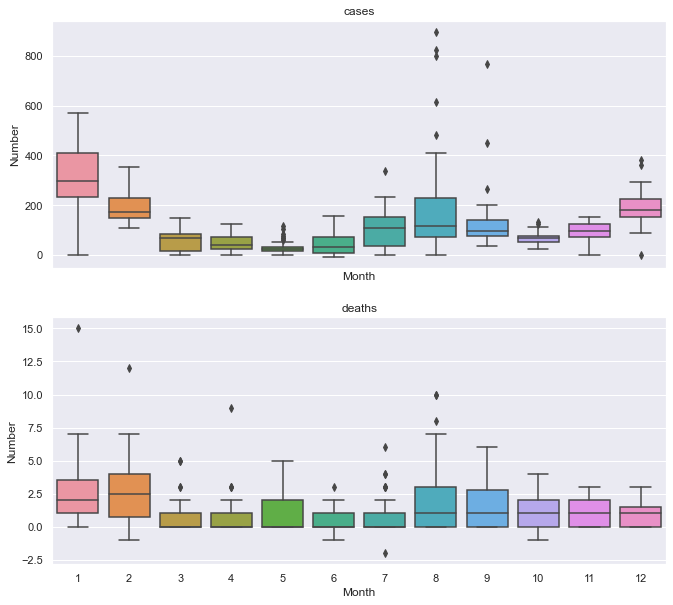

In [24]:
# Box plot to show seasonality
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['cases', 'deaths'], axes):
    sns.boxplot(data=daily_data, x='Month', y=name, ax=ax)
    ax.set_ylabel('Number')
    ax.set_title(name)

# Cleaning up x-axis
if ax != axes[-1]:
    ax.set_xlabel('')